[0.0781]


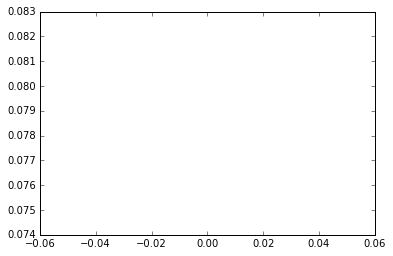

In [3]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
from pynq.pmods import Grove_Haptic_Motor
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(1)

hapticMotor = Grove_Haptic_Motor(4, 4)
while (True):
    try:
        pmod_adc.start_log(2, 10)
# TEMPO DI ACQUISIZIONE
        time.sleep(5)
        values = pmod_adc.get_log()
        print(values)
        if (len(values)>50):
            values=np.asarray(values)
            print(values)
            media=pd.rolling_mean(values,50)
            print(media)
            russamento=False
            for i in range(len(media)):
                if media[i]>0.35 and media[i-1]<=0.35: #soglia sperimentale
                    print("Hai russato al tempo "+str(i//100)+" secondi.")
                    russamento=True
                continue
            if russamento:
                hapticMotor.play(6)
    except KeyboardInterrupt:
    # exit without showing errors if the stop button in Jupyter is pressed
        break
plt.plot(np.arange(len(values)),values)
plt.show()

In [2]:
print(values)

[0.0293]
